In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec



In [18]:
df = pd.read_csv('../data/processed/preprocessed_text.csv')
df = df.dropna()

In [19]:
poems = df['cleaned_text'].tolist()
model = Word2Vec(poems, vector_size=100, window=5, min_count=1, sg=1)


In [20]:
import numpy as np
poem_vectors = []
for poem in poems:
    poem_vector = np.mean([model.wv[word] for word in poem if word in model.wv], axis=0)
    poem_vectors.append(poem_vector)


poem_vectors = np.array(poem_vectors)


In [21]:
poem_vectors = np.nan_to_num(poem_vectors)


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

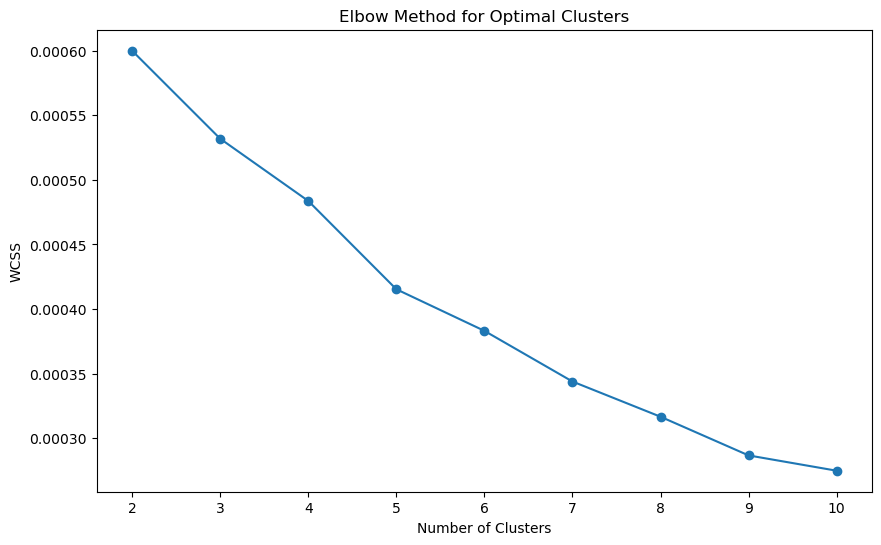

In [22]:
wcss = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(poem_vectors)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()




C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

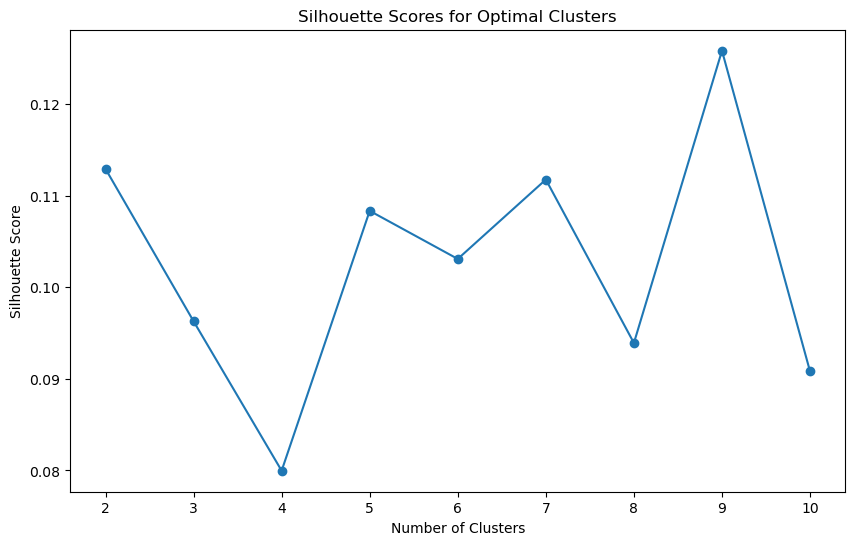

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(poem_vectors)
    silhouette_avg = silhouette_score(poem_vectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Method results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


input_dim = poem_vectors.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


autoencoder.fit(poem_vectors, poem_vectors, epochs=100, batch_size=8, shuffle=True)


encoder = Model(input_layer, encoded)
encoded_poem_vectors = encoder.predict(poem_vectors)


Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 0.2471
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2427
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2364
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2265
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2111
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1883
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1569
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1183
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0783
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0451
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0241
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 13/100
5/5 [==============================] - 0s 5ms/st

In [38]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_poem_vectors)


df['cluster'] = clusters

cluster_mapping = {
    0: "Spirituality",
    1: "Nature & Beauty",
    2: "Life",
    3: "Human Emotions"
}

df['category'] = df['cluster'].map(cluster_mapping)



df.to_csv('../output/clustered_poems.csv', index=False)


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
df

,Title,cleaned_text,cluster,category
0,भिखारी,beggar stand still pitiful eye look silent lig...,1,Nature & Beauty
1,बादल,offspring vast water born summer heat festive ...,1,Nature & Beauty
2,तिनको घँसिया गीत,velvetsoft grassy green roof mountain lush bea...,1,Nature & Beauty
3,सन्ध्या,lalitpurs highart craftsmanship wonder chisel ...,1,Nature & Beauty
4,सम्झना,cloud gather sky sadness descends upon life ta...,2,Life
5,यात्री,temple traveler temple seek offering carry pla...,0,Spirituality
6,प्रश्नोत्तर,nectar drink god earn honest everyone seek hap...,3,Human Emotions
7,आफ्नो घर,thought enter sharp fill heart light dark nigh...,0,Spirituality
9,वृक्ष,tree stand tall spread wide dense cool leaf wh...,1,Nature & Beauty
10,गरीब,poor rich happiness wont wealth anywhere world...,1,Nature & Beauty


In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(encoded_poem_vectors)

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters)
# plt.colorbar()


plt.savefig('../output/pca.png')

plt.close()

